In [17]:
from Pricing4API.main.new_plan import Plan
from Pricing4API.main.new_pricing import Pricing
from Pricing4API.main.new_optimal_subscription import *
from Pricing4API.ancillary.limit import Limit
from Pricing4API.ancillary.time_unit import TimeUnit, TimeDuration
from Pricing4API.utils import format_time


plan_basic = Plan("Basic", (0.0, TimeDuration(1, TimeUnit.MONTH )), overage_cost=0.001, unitary_rate= Limit(1, TimeDuration(100, TimeUnit.MILLISECOND)),
                quotes=[Limit(10, TimeDuration(1, TimeUnit.SECOND)), Limit(1500, TimeDuration(1, TimeUnit.MONTH))], max_number_of_subscriptions=1)

plan_pro = Plan("Pro", (9.95, TimeDuration(1, TimeUnit.MONTH)), overage_cost=0.001, unitary_rate= None,
                quotes=[Limit(10, TimeDuration(1, TimeUnit.SECOND)), Limit(40000, TimeDuration(1, TimeUnit.MONTH))], max_number_of_subscriptions=10)

plan_ultra = Plan("Ultra", (79.95, TimeDuration(1, TimeUnit.MONTH)), overage_cost=0.00085, unitary_rate= None,
                quotes=[Limit(10, TimeDuration(1, TimeUnit.SECOND)), Limit(100000, TimeDuration(1, TimeUnit.MONTH))], max_number_of_subscriptions=10)

plan_mega = Plan("Mega", (199.95, TimeDuration(1, TimeUnit.MONTH)), overage_cost=0.00005, unitary_rate= None,
                quotes=[Limit(50, TimeDuration(1, TimeUnit.SECOND)), Limit(300000, TimeDuration(1, TimeUnit.MONTH))], max_number_of_subscriptions=50)

pricingSendGrid = Pricing("SendGrid", [plan_basic, plan_pro, plan_ultra, plan_mega], "mails")

pricingSendGrid.link_plans()

tabla = pricingSendGrid.create_table()

pricingSendGrid.show_more_table(tabla)



,0,1,2,3
Plan Name,Basic,Pro,Ultra,Mega
Rate,1 calls per MILLISECOND,10 calls per SECOND,10 calls per SECOND,50 calls per SECOND
Quotas,"[10 calls per SECOND, 1500 calls per MONTH]",[40000 calls per MONTH],[100000 calls per MONTH],[300000 calls per MONTH]
Base Cost ($/1 month),0.0,9.95,79.95,199.95
Unit overage cost,0.001,0.001,0.00085,0.00005
Max number of subscriptions,1,10,10,50
Unit Base Cost ($/mails),0.0,0.000249,0.0008,0.000666
New subscription threshold,N/A,49950,194058,4299000
Upgrade plan threshold,11449,110000,241176,N/A
Downgrade plan threshold,N/A,11449,110000,241176


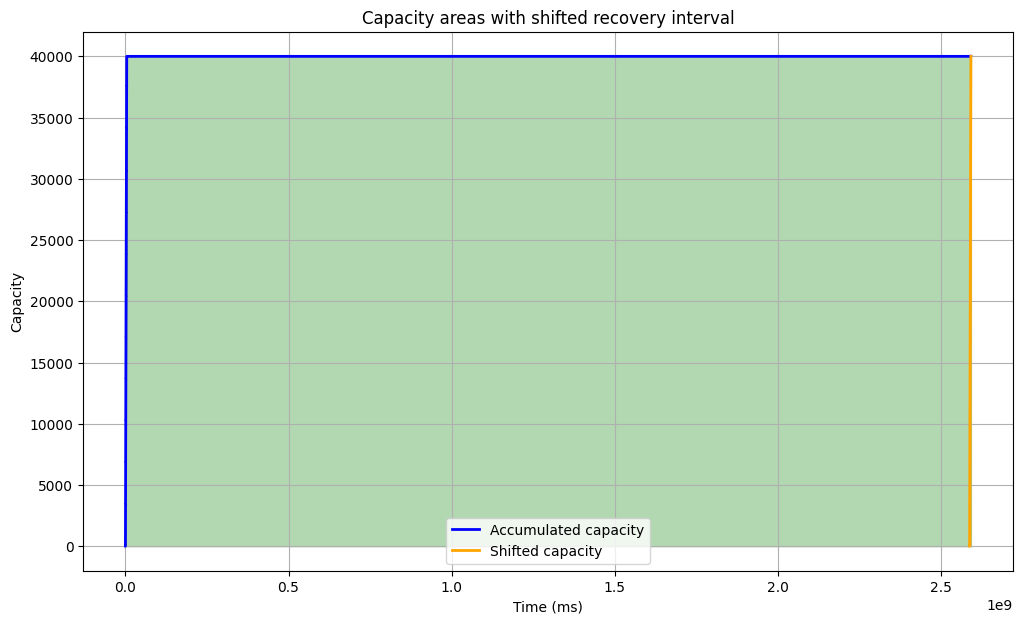

In [3]:
plan_pro.show_shifted_capacity_curve(TimeDuration(1, TimeUnit.MONTH))

In [ ]:
time_duration = TimeDuration(1, TimeUnit.MONTH)
plans = pricingSendGrid.plans
print(plans[0].show_available_capacity_curve(time_duration))
print(plans[1].show_available_capacity_curve(time_duration))
print(plans[2].show_available_capacity_curve(time_duration))
print(plans[3].show_available_capacity_curve(time_duration))

In [7]:
print(plan)

{'DBLP': {'pricing': {'cost': 0.0, 'billing': 'monthly'}, 'unitary_rate': {'/*': {'all': {'requests': {'period': {'value': 1, 'unit': 'second'}}}}}, 'quotas': {'/*': {'all': {'requests': [{'max': 10, 'period': {'value': 100, 'unit': 'millisecond'}}, {'max': 10, 'period': {'value': 1, 'unit': 'second'}}, {'max': 2000, 'period': {'value': 1, 'unit': 'month'}}]}}}, 'overage': {'excess': 1, 'cost': 0.001}, 'max_number_of_subscriptions': 1}}


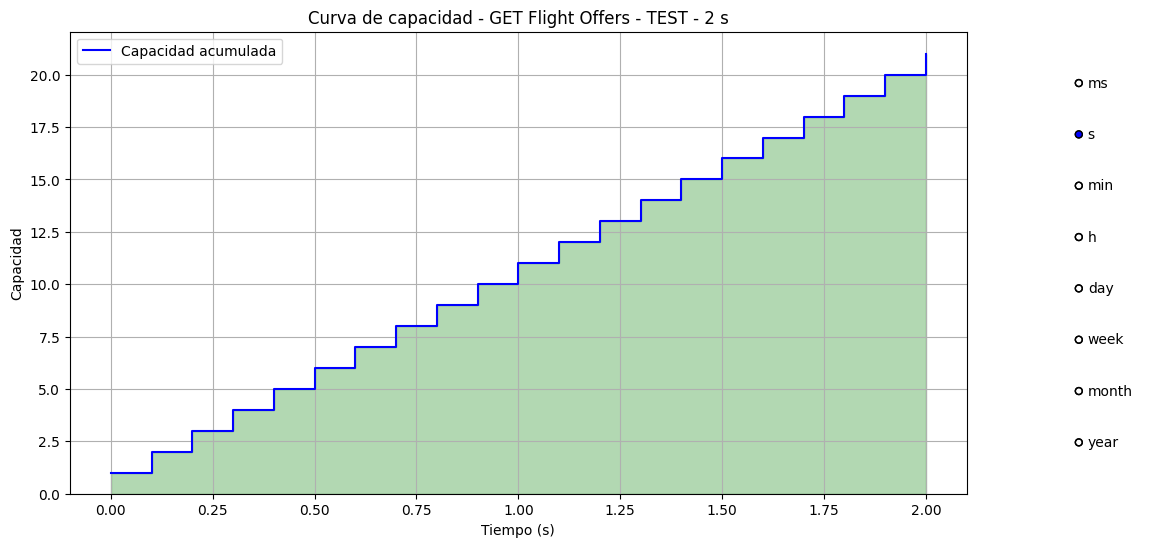

In [2]:
plan_amadeus_free = Plan("GET Flight Offers - TEST", (0.0, TimeDuration(1, TimeUnit.MONTH)), overage_cost=None, unitary_rate=Limit(1, TimeDuration(100, TimeUnit.MILLISECOND)),
                         quotes=[Limit(10, TimeDuration(1, TimeUnit.SECOND)), Limit(2000, TimeDuration(1, TimeUnit.MONTH))], max_number_of_subscriptions=1)


time_duration=TimeDuration(2, TimeUnit.SECOND)
plan_amadeus_free.show_available_capacity_curve(time_duration)

In [3]:
time_duration=TimeDuration(432, TimeUnit.MILLISECOND)

plan_amadeus_free.available_capacity(time_duration, limits_length=len(plan_amadeus_free.limits)-1)



5.0

In [12]:
plan_amadeus_free.min_time(5)

400.0 ms

In [4]:
pricingAmadeus = Pricing("Amadeus", [plan_amadeus_free], "requests")

pricingAmadeus.link_plans()

tabla = pricingAmadeus.create_table()

pricingAmadeus.show_more_table(tabla)

,0
Plan Name,GET Flight Offers - TEST
Rate,1 calls per MILLISECOND
Quotas,"[10 calls per SECOND, 2000 calls per MONTH]"
Base Cost ($/1 month),0.0
Unit overage cost,None
Max number of subscriptions,1
Unit Base Cost ($/requests),0.0
New subscription threshold,N/A
Upgrade plan threshold,N/A
Downgrade plan threshold,N/A


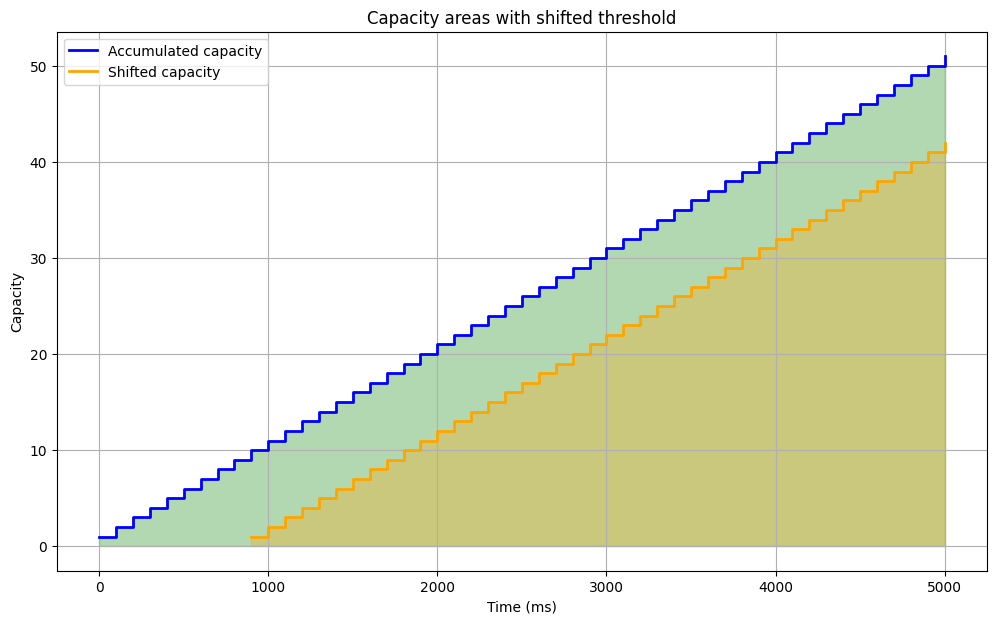

In [ ]:
plan_amadeus_free.show_capacity_areas(TimeDuration(5, TimeUnit.SECOND))

# NO ENTIENDO LO DE LA PÉRDIDA DE CAPACIDAD, REALMENTE ME FUNDO LA CAPACIDAD MUY PRONTO
# CREO QUE EL PROBLEMA ESTÁ EN CUÁNTO ESTOY DESPLAZANDO LA VENTANA, LO HAGO CON EL PRIMER LÍMITE..., pero no sé cuanto hay que moverlo

In [20]:
from Pricing4API.new_plan import Plan

loaded_plan = Plan.from_yaml("C:\\Users\\ramon\\proyecto_iris\\Pricing4API\\new_notebooks\\yaml\\plan_dblp.yaml")



FileNotFoundError: [Errno 2] No such file or directory: '..\\yaml\\plan_dblp.yaml'

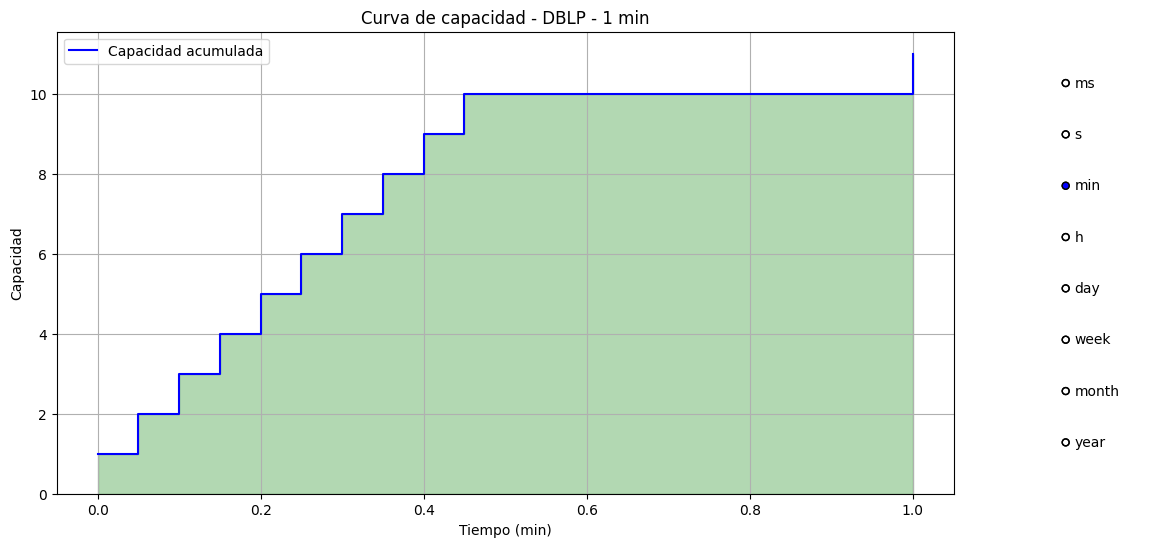

In [18]:
from Pricing4API.ancillary.time_unit import TimeUnit, TimeDuration
loaded_plan.show_available_capacity_curve(TimeDuration(1, TimeUnit.MINUTE))


In [21]:
import os
print(os.getcwd())


c:\Users\ramon\proyecto_iris\Pricing4API\new_notebooks
